# Determinare il consumo o meno di sostanze farmacologicamente attive


**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Veronica Biancacci

## Descrizione del problema, analisi esplorativa


Si deve realizzare un modello che, utilizzando i dati del seguente dataset, possa stabilire il consumo o meno di determinate sostanze da parte dei soggetti presi in caso.

Il dataset contiene 1885 casi di studio, ognuno con 12 attributi: età, sesso, livello di educazione, paese di residenza, etnicità e attributi sulla personalità, misurati attraverso modelli di testing per la valutazione della personalità, quali il NEO-FFI-R (neuroticismo, estroversione, apertura all'esperienze, "piacevolezza" (agreeableness) e conscienziosità), il BIS-11 (impulsività), e ImpSS (ricerca di emozioni).


Vengono importate le librerie necessarie per scaricare i file, organizzare le strutture dati e disegnare i grafici.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
url = "https://git.io/JfhKD"
dataset = pd.read_csv(url, error_bad_lines=False).drop(columns="ID")

In [3]:
dataset.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    Ascore   Cscore  ...  Ecstasy  Heroin Ketamine Legalh  LSD Meth Mushrooms  \
0 -0.91699 -0.00665  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL0   
1  0.76096 -0.14277  ...      CL4     CL0      CL2    CL0  CL2  CL3       CL0   
2 -1.62090 -1.01450  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL1   
3  0.59042  0.58489  ...      CL0     CL0      CL2    CL0  CL0  CL0       CL0   
4 -0.30172  1.30612  ...      CL1     CL0      CL0    CL1  CL0  CL0       CL2   

  Nicotine Semer  VSA  
0      CL2   CL0  CL0  
1      CL4   CL0  CL0  
2      CL0   CL0  CL0  
3      CL2   CL0  CL0  
4      CL2   CL0  CL0  

[5 rows x 31 columns]

In [4]:
dataset.shape

(1885, 31)

Come possiamo notare questo dataset ha 32 colonne. Questo perchè oltre ai 12 attributi introdotti in precedenza troviamo i consumi riferiti a 20 sostanze: alcohol, anfetamina, nitrito di amile, benzodiazepina, cannabis, cioccolato, cocaina, caffeina, crack, ecstasy, eroina, ketamina, sostanze legali, LSD, metadone, funghi allucinogeni, nicotina, abuso di sostanze volatili e una droga fittizia denominata Semeron introdotta per identificare i sogetti di studio che hanno affermato di aver fatto uso di sostanze che in realà non hanno mai consumato.

Nel caso particolare di questo problema prenderemo come sostanza di studio la cannabis, come spiegato meglio in seguito.

### Significato e distibuzione delle feature relative ai soggetti di studio


La prima cosa che si nota osservando i valori del dataset e le sue statistiche è che tutti i dati sono caratterizzati da numeri discreti con valore assoluto molto basso e range simile.


In particolare le feature sulla personalità sembrano essere valori standardizzati, in quanto hanno una media molto vicina allo 0 e una deviazione standard vicina all'1. 


Si differenziano un po' i dati personali, i quali non rispettano a pieno questa regola, come si può osservare in particolare nel caso di gender e etnicity.



In [5]:
dataset.describe()

Age       Gender    Education      Country    Ethnicity  \
count  1885.00000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.03461    -0.000256    -0.003806     0.355542    -0.309577   
std       0.87836     0.482588     0.950078     0.700335     0.166226   
min      -0.95197    -0.482460    -2.435910    -0.570090    -1.107020   
25%      -0.95197    -0.482460    -0.611130    -0.570090    -0.316850   
50%      -0.07854    -0.482460    -0.059210     0.960820    -0.316850   
75%       0.49788     0.482460     0.454680     0.960820    -0.316850   
max       2.59171     0.482460     1.984370     0.960820     1.907250   

            Nscore       Escore       Oscore       Ascore       Cscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.000047    -0.000163    -0.000534    -0.000245    -0.000386   
std       0.998106     0.997448     0.996229     0.997440     0.997523   
min      -3.464360    -3.273930    -3.273930    -3.464360    -3.464360   
25%      -0.678250    -0.695090    -0.717270    -0.606330    -0.652530   
50%       0.042570     0.003320    -0.019280    -0.017290    -0.006650   
75%       0.629670     0.637790     0.723300     0.760960     0.584890   
max       3.273930     3.273930     2.901610     3.464360     3.464360   

         Impulsive           SS  
count  1885.000000  1885.000000  
mean      0.007216    -0.003292  
std       0.954435     0.963701  
min      -2.555240    -2.078480  
25%      -0.711260    -0.525930  
50%      -0.217120     0.079870  
75%       0.529750     0.765400  
max       2.901610     1.921730

Questo dataset ci fronisce quindi dei dati numerici, nonostante in realtà le feature originali siano di diversi tipi: categorico ordinale (l'età e l'educazione), nominale (sesso, paese e etnicità) e numeriche di intervallo (gli attributi sulla personalità).


Andiamo ora a visualizzare nello specifico il significato dei valori delle feature riguardanti i dati personali dei soggetti e la loro distribuzione attraverso il boxplot e il grafico a torta.



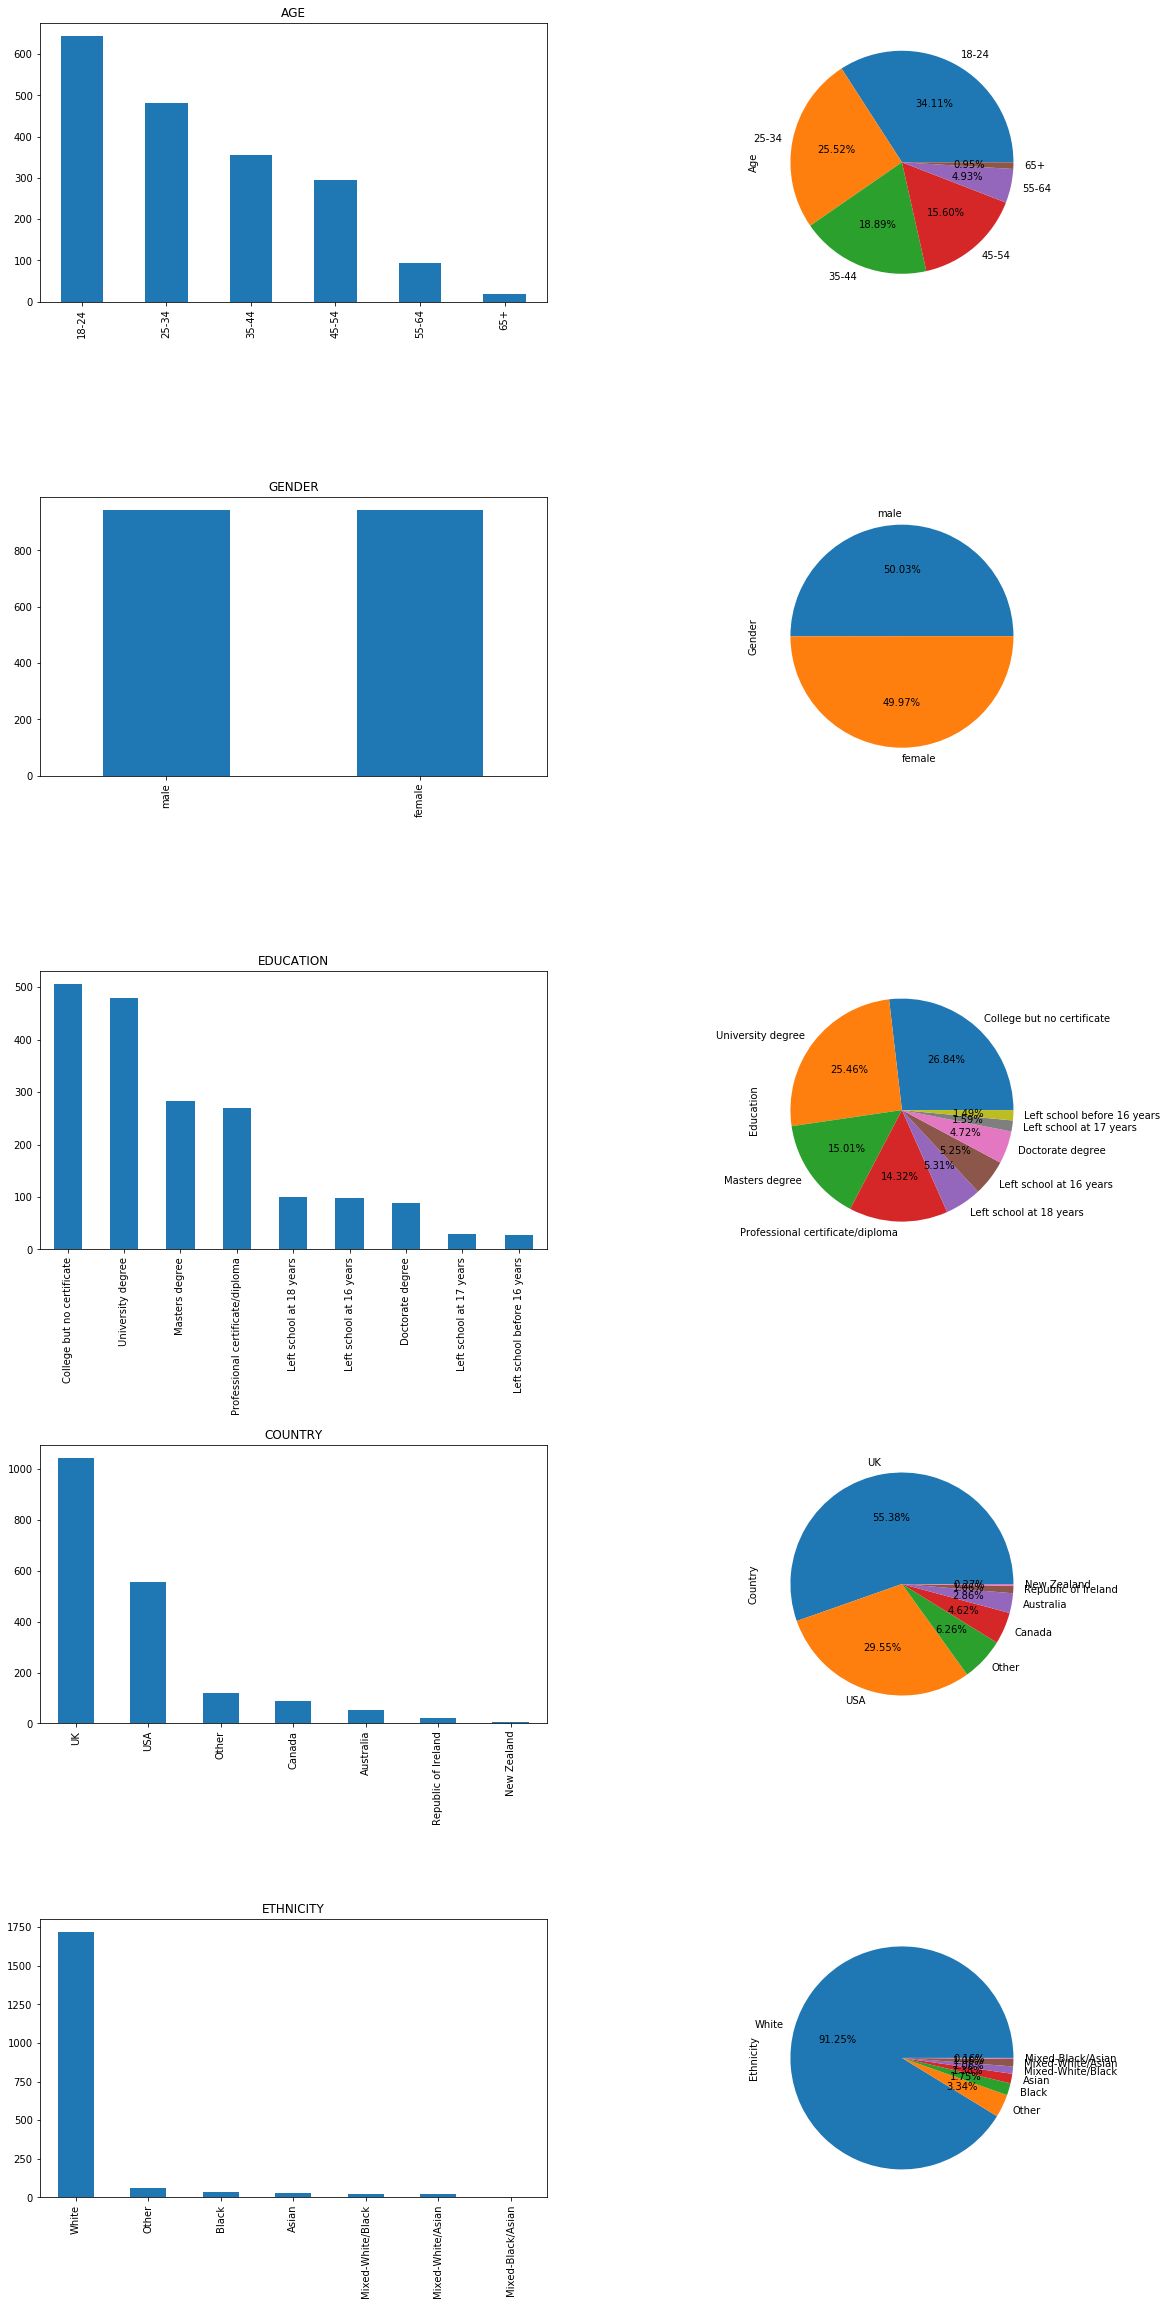

In [6]:
plt.figure(figsize=(20, 40))
plt.subplots_adjust( hspace=0.7)

age = dataset['Age'].astype(np.str)
age.replace({"-0.9519700000000001": "18-24", "-0.07854":"25-34", "0.49788000000000004":"35-44", "1.09449":"45-54", "1.82213":"55-64", "2.59171":"65+"}, inplace=True)
plt.subplot(5, 2, 1)
plt.title("AGE");
age.value_counts().plot.bar()
plt.subplot(5, 2, 2)
age.value_counts().plot.pie(autopct='%1.2f%%');

gender = dataset['Gender'].astype(np.str)
gender.replace({"0.48246000000000006":"female", "-0.48246000000000006": "male"}, inplace=True)
plt.subplot(5, 2, 3)
plt.title("GENDER");
gender.value_counts().plot.bar()
plt.subplot(5, 2, 4)
gender.value_counts().plot.pie(autopct='%1.2f%%');

education = dataset['Education'].astype(np.str)
education.replace({"-2.43591":"Left school before 16 years", "-1.7379": "Left school at 16 years", "-1.43719": "Left school at 17 years", 
                "-1.22751": "Left school at 18 years", "-0.6111300000000001": "College but no certificate", 
                 "-0.059210000000000006": "Professional certificate/diploma", "0.45468000000000003": "University degree", 
                "1.16365": "Masters degree", "1.98437": "Doctorate degree"}, inplace=True)
plt.subplot(5, 2, 5)
plt.title("EDUCATION");
education.value_counts().plot.bar()
plt.subplot(5, 2, 6)
education.value_counts().plot.pie(autopct='%1.2f%%');

country = dataset['Country'].astype(np.str)
country.replace({"-0.09765": "Australia", "0.24923" :"Canada", "-0.46841000000000005": "New Zealand", "-0.28519" :"Other", "0.21128000000000002" :"Republic of Ireland", 
                 "0.9608200000000001": "UK", "-0.57009": "USA"}, inplace=True)
plt.subplot(5, 2, 7)
plt.title("COUNTRY");
country.value_counts().plot.bar()
plt.subplot(5, 2, 8)
country.value_counts().plot.pie(autopct='%1.2f%%');

ethnicity= dataset['Ethnicity'].astype(np.str)
ethnicity.replace({"-0.50212" :"Asian", "-1.1070200000000001" :"Black", "1.90725":"Mixed-Black/Asian", "0.126" :"Mixed-White/Asian", "-0.22166": "Mixed-White/Black",
                   "0.1144": "Other", "-0.31685": "White"}, inplace=True)
plt.subplot(5, 2, 9)
plt.title("ETHNICITY");
ethnicity.value_counts().plot.bar()
plt.subplot(5, 2, 10)
ethnicity.value_counts().plot.pie(autopct='%1.2f%%');

Come possiamo osservare, l'età prevalente dei soggetti presi in caso è tra i 18-34 anni e  il sesso è equamente distribuito tra maschi e femmine. Nonstante l'educazione si distribuisce per lo più tra le categorie "College but no certificate" e "University degree", più della metà dei soggetti sono in possesso di un qualche tipo di certificazione. Inoltre più della metà dei partecipanti vive nel Regno Unito, quasi il 30% negli USA e il restante campione in altri paesi. Infine possimao notare che l'attributo "Ethnicity" è caratterizzato da scarsa variabilità, in quanto più del 91% dei valori appartengono alla categoria "white".





Per quanto riguarda gli attributi rimasti, ognuno di essi rappresenta un tratto della personalità ed erano originariamente definiti da dei punteggi caratterizzati da scale diverse. Più lo score è alto, più la corrispettiva personalità è enfatizzata nel soggetto.

I dati nel dataset sono caratterizzati da una  distribuzione abbastanza concentrata nei valori centrali, che corrispondono ad un punteggio discreto del particolare tratto considerato.


Ad esempio, come abbiamo già visto nelle statistiche degli attributi del dataset, i punteggi di nScore ottenuti variano da un minimo di 12 punti pari al valore  -3.46436 fino ad un punteggio totalizzato di 60 punti pari a 3.27393. 

Possiamo osservare nei seguenti box plot come in tutti i casi, il 50% dei dati (tra il primo e il terzo percentile) si collochino in modo abbastanza centrale rispetto al range totale in cui sono distributiti i valore di ogni attributo.







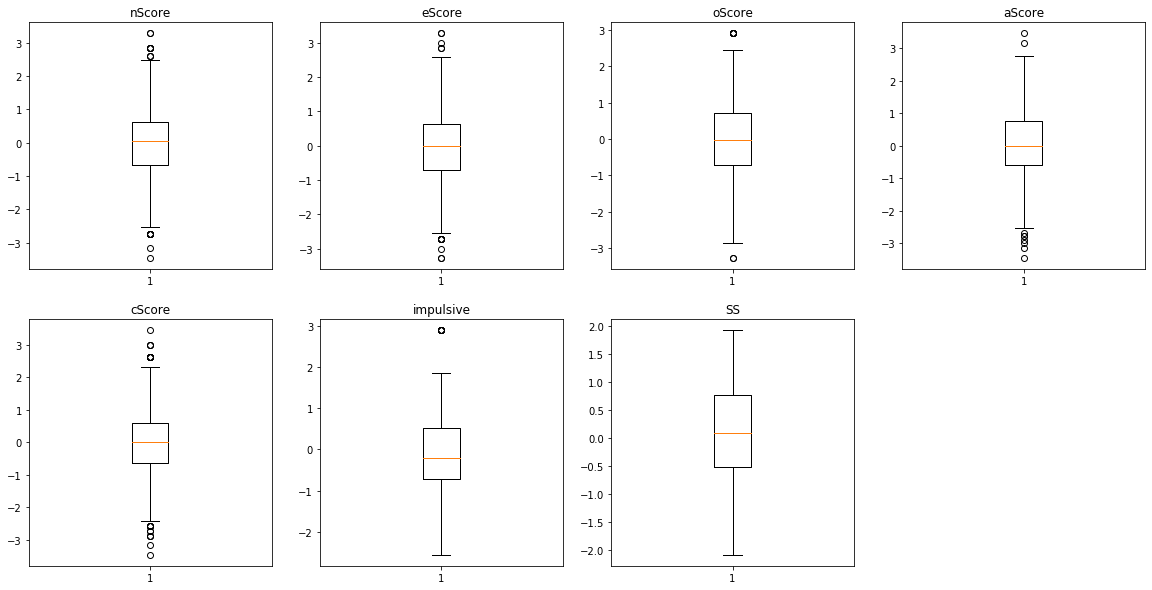

In [7]:

plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.title('nScore')
plt.boxplot(dataset['Nscore'])

plt.subplot(2, 4, 2)
plt.title('eScore')
plt.boxplot(dataset['Escore'])

plt.subplot(2, 4, 3)
plt.title('oScore')
plt.boxplot(dataset['Oscore'])

plt.subplot(2, 4, 4)
plt.title('aScore')
plt.boxplot(dataset['Ascore'])

plt.subplot(2, 4, 5)
plt.title('cScore')
plt.boxplot(dataset['Cscore'])

plt.subplot(2, 4, 6)
plt.title('impulsive')
plt.boxplot(dataset['Impulsive'])

plt.subplot(2, 4, 7)
plt.title('SS')
plt.boxplot(dataset['SS'])

plt.show()

### Significato delle sostanze farmacologicamente attive e descizione del problema nel dettaglio

Per quanto riguarda i 20 attributi relativi alle sostanze, ognuno di essi può avere i seguenti 7 valori:

- CL0 -> mai usata
- CL1 -> usata più di un decennio fa
- CL2 -> usata nell'ultimo decennio
- CL3 -> usata nell'ultimo anno
- CL4 -> usata nell'ultimo mese
- CL5 -> usata nell'ultima settimana
- CL6 -> usata ieri

Una caratteristica di questo dataset è il gran numero di problemi di classificazione da poter risolvere. 

Per ogni sostanza infatti si potrebbe introdurre un problema di classificazione multiclasse e uno di classificazione binaria, riducendo le 7 classi presenti in "Non-User" (CL0 e CL1) e "User" (le restanti classi).

Si decide quindi di ridurre il problema a una classificazione binaria, in quanto, test fatti su altri notebook (e non mostrati qui poichè non rientrano nel problema preso in considerazione) mostrano come i problemi multiclasse su questo dataset superino scarsamente il 50% di accuratezza.


In [8]:
dataset.replace({"CL0":"0","CL1": "0", "CL2": "1", "CL3": "1", "CL4": "1", "CL5": "1", "CL6": "1"}, inplace=True)


Dopo aver esaminato la distribuzione di questi dati si è deciso di prendere in considerazione il problema che ha come y "cannabis".

Questa decisione è stata fatta sulla base del fatto che questa è una delle poche sostanze che presenta una distribuzione dei dati non troppo sbilanciata rispetto alle altre sostanze presenti nel dataset.


Ad esempio possiamo notare come una sostanza come il crack è poco utilizzata, mentre una molto comune come la caffeina è altamente consumata.




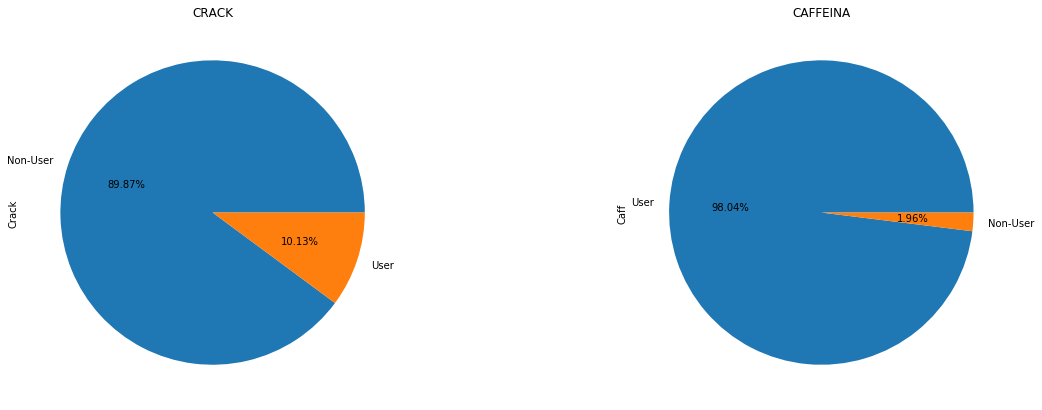

In [9]:
plt.figure(figsize=(20, 7))
plt.subplots_adjust( hspace=0.7)

plt.subplot(1, 2, 1)
plt.title("CRACK");
crack = dataset['Crack']
crack = crack.astype(np.str)
crack.replace({"0":"Non-User", "1": "User"}, inplace=True)
crack.value_counts().plot.pie(autopct='%1.2f%%');

plt.subplot(1, 2, 2)
plt.title("CAFFEINA");
caff = dataset['Caff']
caff = caff.astype(np.str)
caff.replace({"0":"Non-User", "1": "User"}, inplace=True)
caff.value_counts().plot.pie(autopct='%1.2f%%');

La sceta ricade sulla cannabis anche perchè secondo il paper originale è una delle sostanze che ha dato miglior risultati.


La y presa quindi in considerazione per il nostro problema è la seguente:


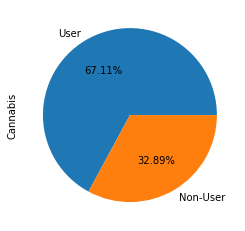

In [10]:
y = dataset['Cannabis']
cannabis = y.astype(np.str)
cannabis.replace({"0":"Non-User", "1": "User"}, inplace=True)
cannabis.value_counts().plot.pie(autopct='%1.2f%%');

### Correlazione tra le feature



Per prima cosa andiamo a vedere come i dati personali dei partecipanti influiscano sull'uso o meno di cannabisi, attraverso il seguente grafico di istogrammi


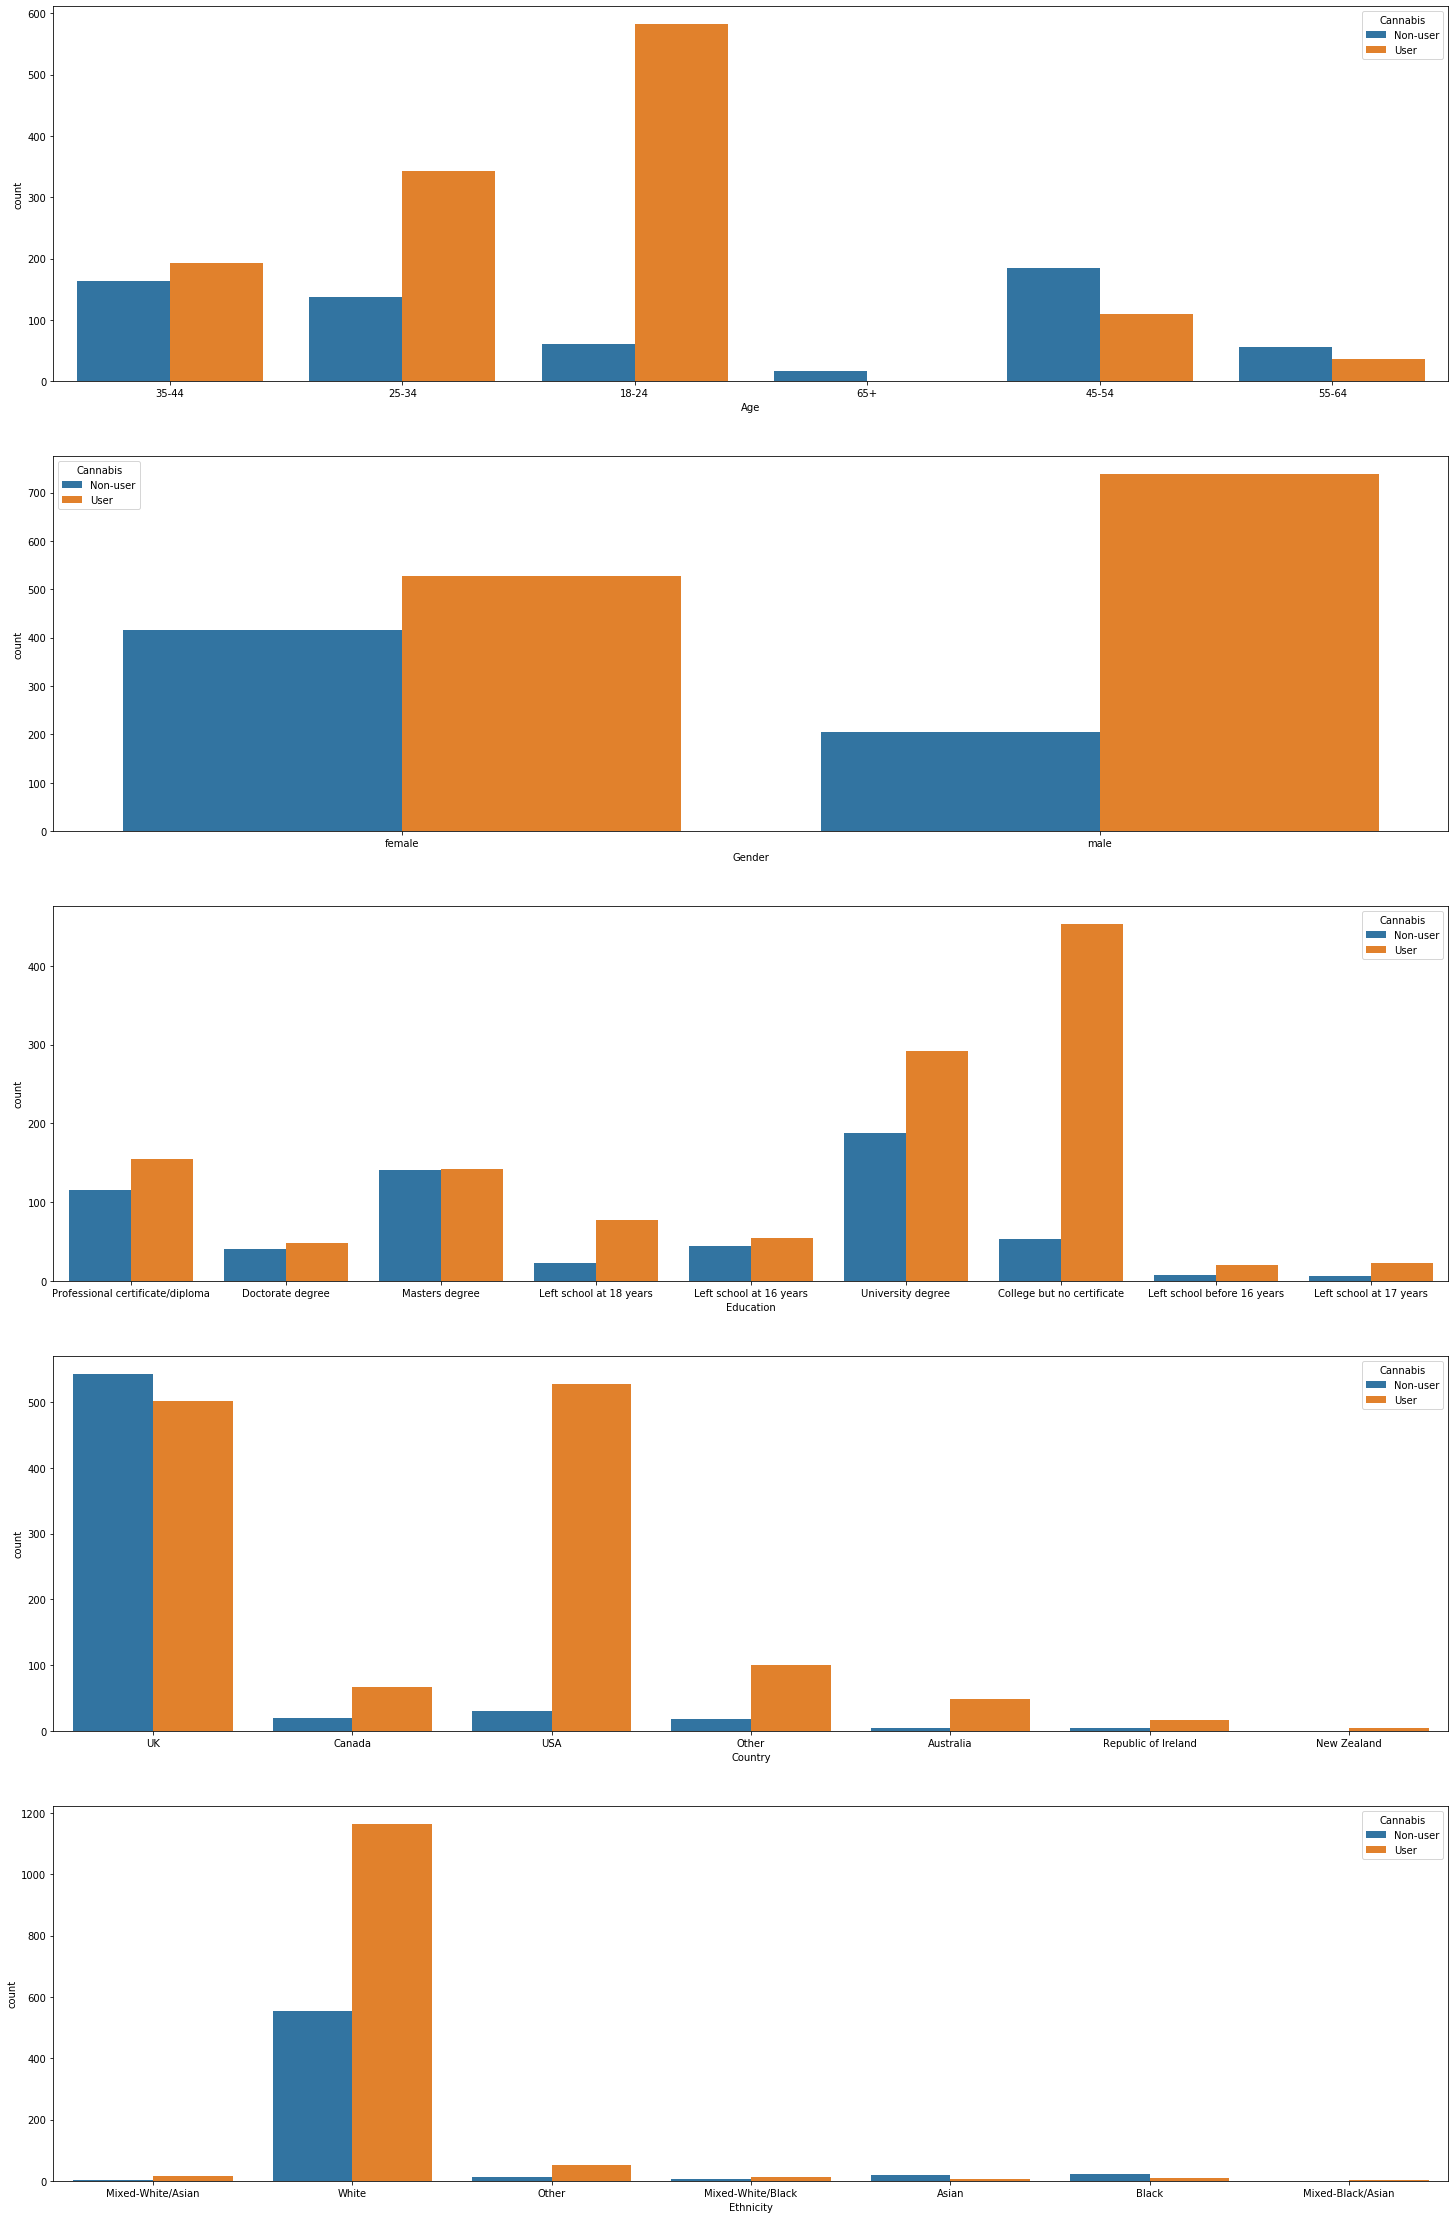

In [11]:
f, axes = plt.subplots(5, 1, figsize=(25, 40))

dt = dataset.astype(np.str)
dt.replace({"-0.9519700000000001": "18-24", "-0.07854":"25-34", "0.49788000000000004":"35-44", "1.09449":"45-54", "1.82213":"55-64", "2.59171":"65+"}, inplace=True)
dt.replace({"0.48246000000000006":"female", "-0.48246000000000006": "male"}, inplace=True)
dt.replace({"-2.43591":"Left school before 16 years", "-1.7379": "Left school at 16 years", "-1.43719": "Left school at 17 years", 
                "-1.22751": "Left school at 18 years", "-0.6111300000000001": "College but no certificate", 
                 "-0.059210000000000006": "Professional certificate/diploma", "0.45468000000000003": "University degree", 
                "1.16365": "Masters degree", "1.98437": "Doctorate degree"}, inplace=True)
dt.replace({"-0.09765": "Australia", "0.24923" :"Canada", "-0.46841000000000005": "New Zealand", "-0.28519" :"Other", "0.21128000000000002" :"Republic of Ireland", 
                 "0.9608200000000001": "UK", "-0.57009": "USA"}, inplace=True)
dt.replace({"-0.50212" :"Asian", "-1.1070200000000001" :"Black", "1.90725":"Mixed-Black/Asian", "0.126" :"Mixed-White/Asian", "-0.22166": "Mixed-White/Black",
                   "0.1144": "Other", "-0.31685": "White"}, inplace=True)
dt.replace({"1": "User", "0": "Non-user"}, inplace = True)

sns.countplot( x='Age', hue='Cannabis', data = dt,  ax=axes[0]);
sns.countplot(x='Gender', hue='Cannabis', data = dt, ax=axes[1]);
sns.countplot(x='Education', hue='Cannabis', data = dt, ax=axes[2]);
sns.countplot(x='Country', hue='Cannabis', data = dt, ax=axes[3]);
sns.countplot(x='Ethnicity', hue='Cannabis', data = dt, ax=axes[4]);


Possimao notare come il valore "User" sia molto più elevato del rispettivo "Non-user" nei soggetti giovani, in quelli di sesso maschile e in particolare per coloro con paese di residenza USA, e che rientrano nella categoria "College but no certificate".




Andiamo ora ad osservare la correlazione tra gli attributi della personalità:


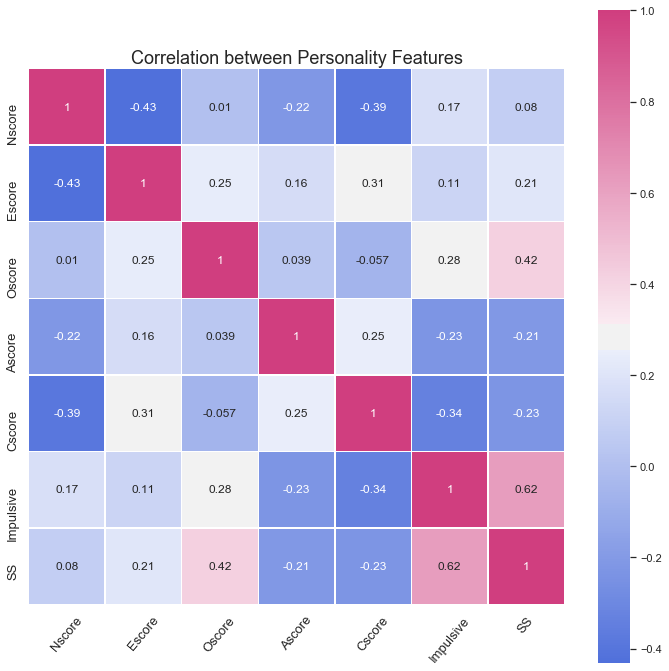

In [12]:
data = dataset.iloc[:, 5:12].corr()

plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(260, 350, as_cmap=True)
sns.set(font_scale=1)
hm = sns.heatmap(data, cmap = cmap,annot=True, square=True, linewidths=.5, 
             yticklabels = dataset.iloc[:, 5:12].columns, xticklabels = dataset.iloc[:, 5:12].columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation between Personality Features",fontsize=18)
plt.show()

Come possiamo vedere la maggior parte dei tratti di personalità non sono molto correlati, ad eccezione  della ricerca di sensazioni (SS) con l'impulsività (impulsive) e l'apertura a nuove esperienze (oScore).


Inoltre, valori alti di questi attributi, corrispondono prevalmentemente a valori 1 (User) di "cannabis", come si può osservare nel seguente grafico che rappresenta per ogni valore di SS, impulsive e oScore, i rispettivi User e Non-User.




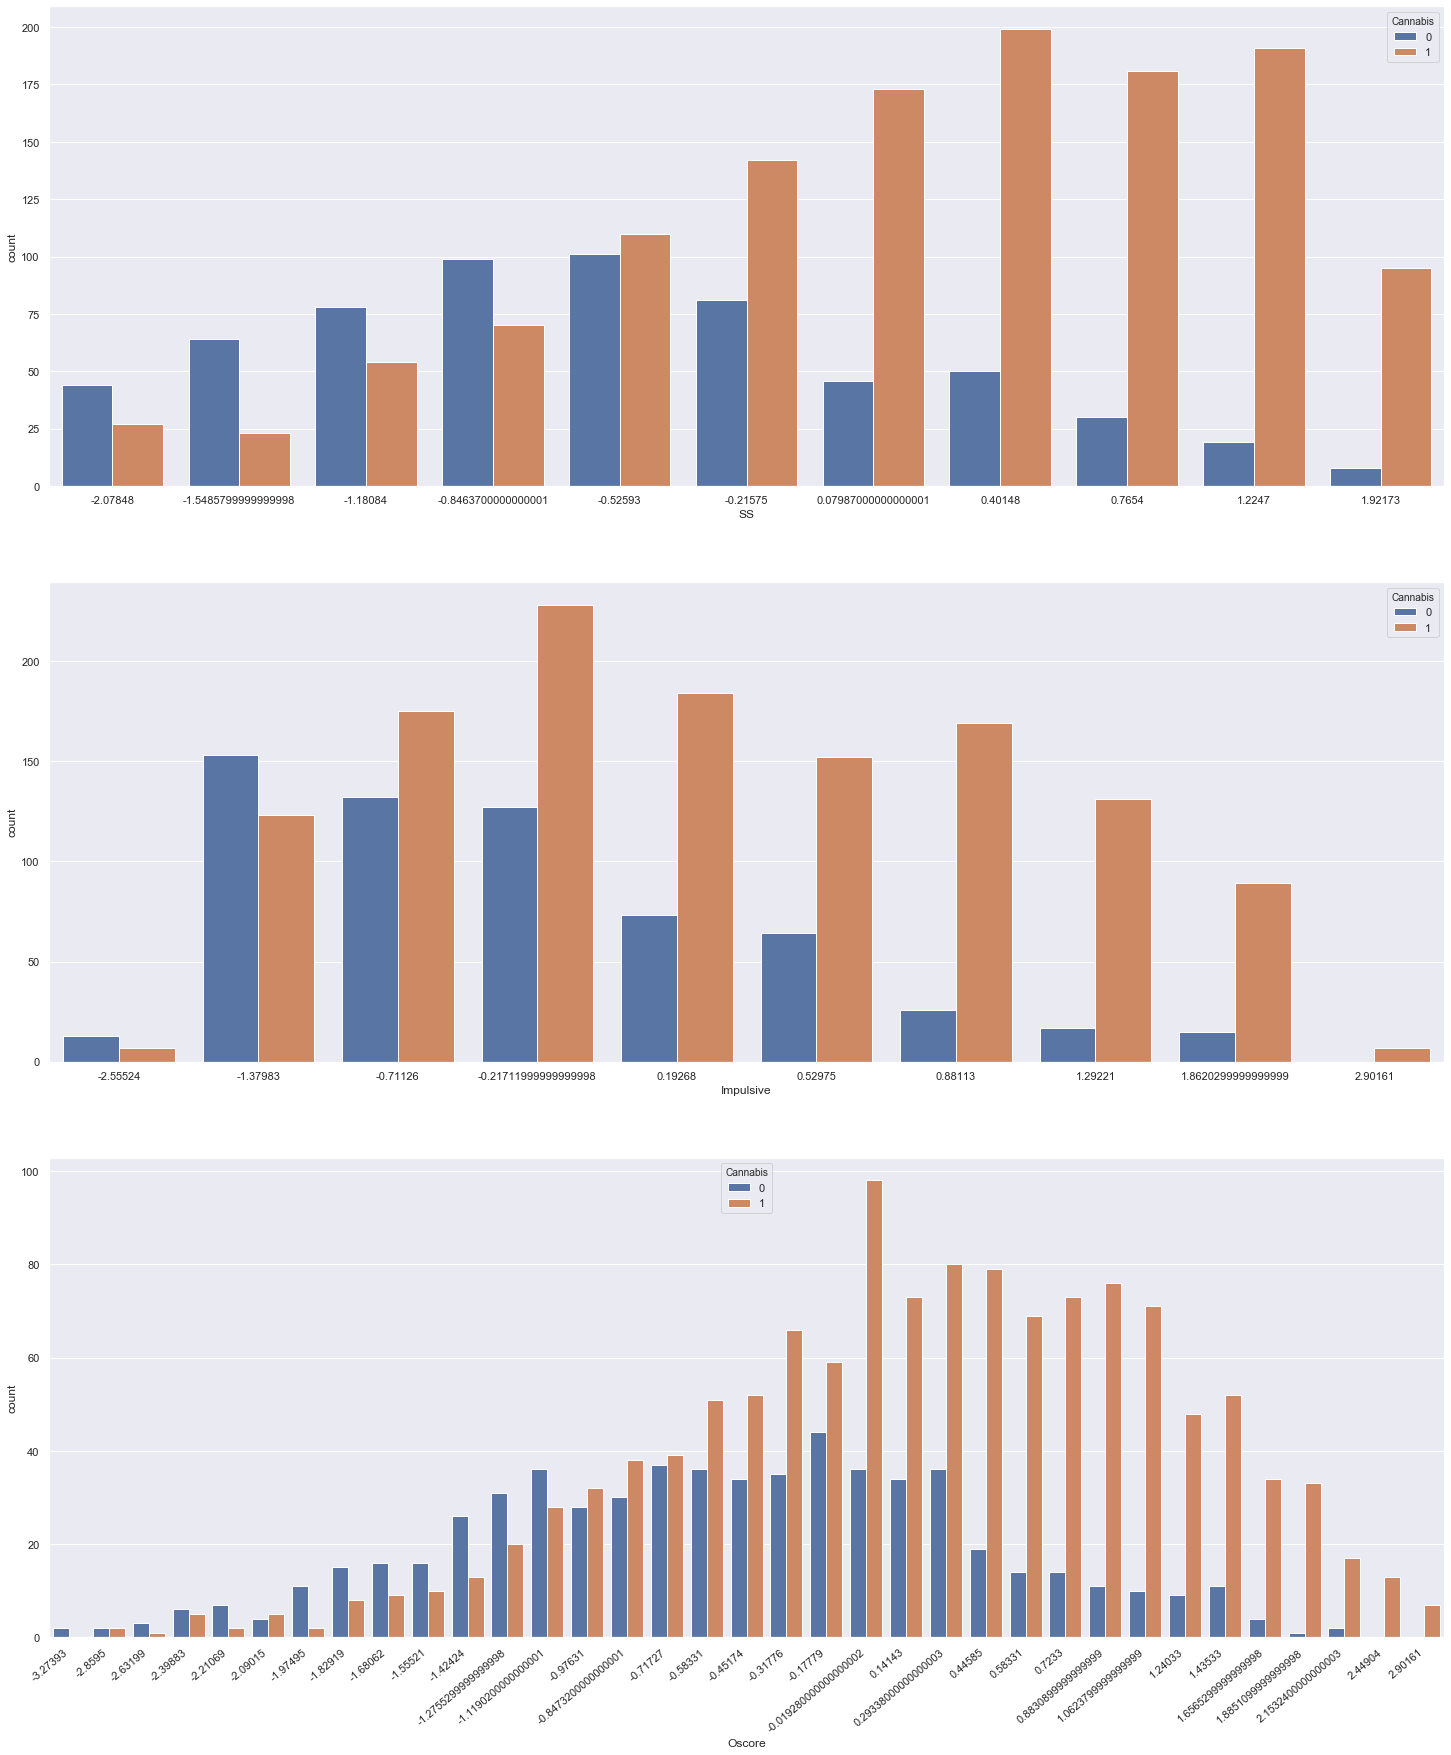

In [13]:
f, axes = plt.subplots(3, 1, figsize=(25, 30))

sns.countplot(x='SS', hue='Cannabis', data = dataset,  ax=axes[0]);
sns.countplot(x='Impulsive', hue='Cannabis', data = dataset, ax=axes[1]);
o = sns.countplot(x='Oscore', hue='Cannabis', data = dataset, ax=axes[2]);

o.set_xticklabels(o.get_xticklabels(), rotation=40, ha="right");


Sempre dal grafico di correlazione precedente si possono notare alcune features inversamente correlate.
Al crescere di nScore (neuroticismo) diminuiscono eScore (estroversione), aScore ("piacevolezza") e cScore (conscienziosità), inoltre al diminuire di cScore aumentano impulsive e SS (che abbiamo detto essere direttamente correlate).


In concordanza al fatto che gli User di cannabis aumentano con l'aumentare di SS e Impulsive, possiamo dimostrare che ciò accade anche per nScore , mentre si dovrebbe verificare l'opposto alle feature inversamente correlate eScore, aScore e cScore.


Come possiamo osservare, questa regola influenza poco aScore e eScore.





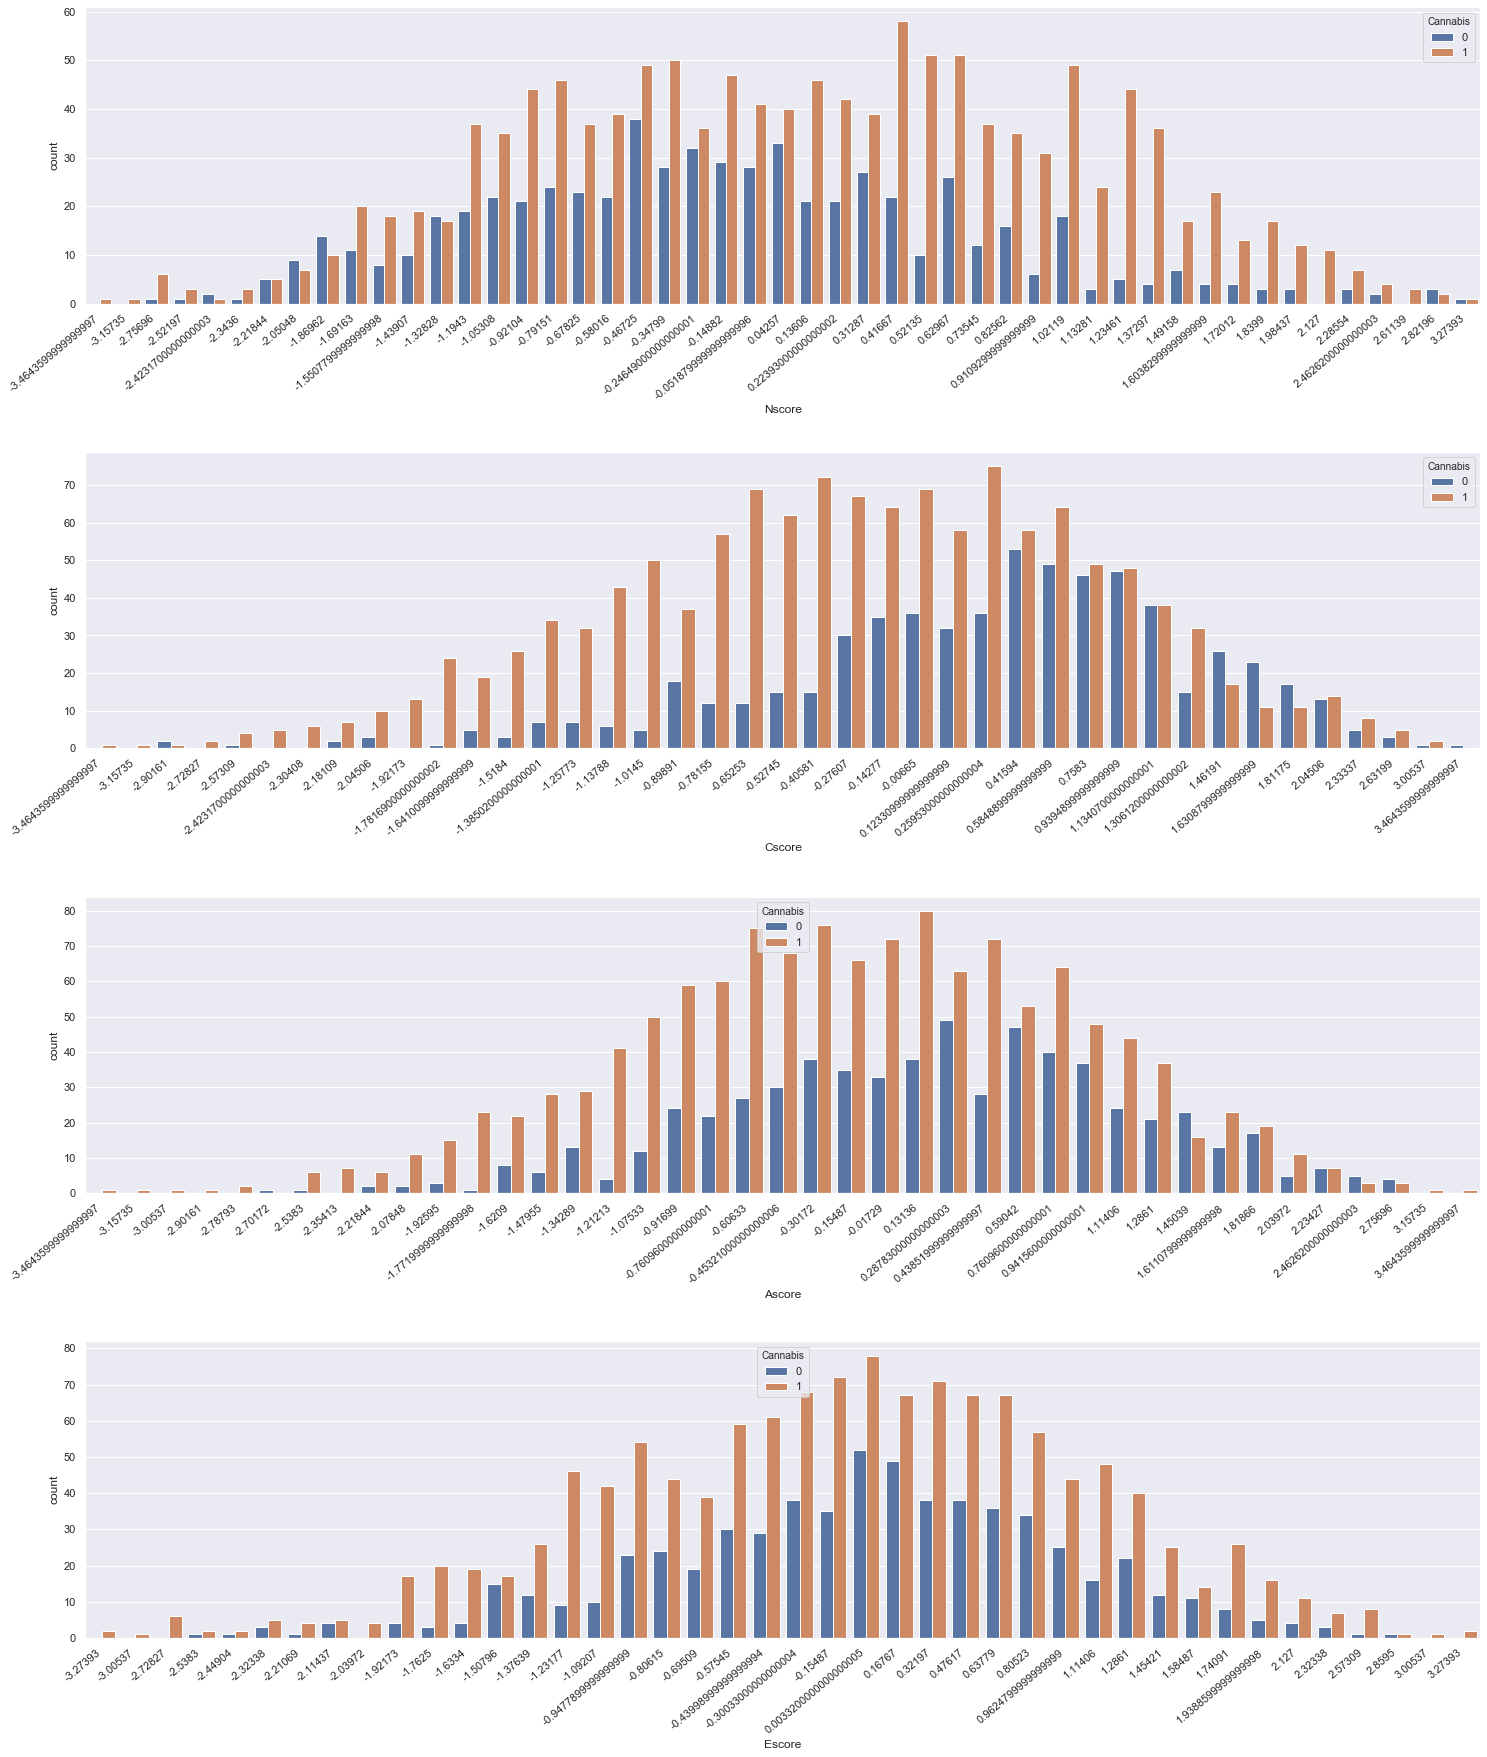

In [14]:
f, axes = plt.subplots(4, 1, figsize=(25, 30))
plt.subplots_adjust( hspace=0.5)

n = sns.countplot(x='Nscore', hue='Cannabis', data = dataset,  ax=axes[0]);
c = sns.countplot(x='Cscore', hue='Cannabis', data = dataset, ax=axes[1]);
a = sns.countplot(x='Ascore', hue='Cannabis', data = dataset, ax=axes[2]);
e = sns.countplot(x='Escore', hue='Cannabis', data = dataset, ax=axes[3]);

n.set_xticklabels(n.get_xticklabels(), rotation=40, ha="right");
c.set_xticklabels(c.get_xticklabels(), rotation=40, ha="right");
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right");
e.set_xticklabels(e.get_xticklabels(), rotation=40, ha="right");

## Feature processing



Importiamo le librerie che ci sarannò utili per il processamento delle feature.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

Prepariamo ora i dati da utilizzare nei nostri modelli.

Normalmente i dati categorici andrebbero gestiti tramite codifica "one hot".

Decidiamo nonostante questo di mantenere i dati forniti dal dataset originale per due motivi:

- le feature categoriche ordinali sono convertite in numeri mantenendo per l'appunto "l'ordine" che c'è tra le varie categorie, cosa che sembra essere ragionevole

- le feature categoriche nominali sono ordinate in base al rapporto che c'è tra gli User e Non-user di una classe. La classe che ha la percentuale più alta di User ha il valore numerico più alto, nel caso dell'etnia, il contrario per gender e paese di residenza. Sulla base di questo ci apettiamo che all'etnia  venga associato un parametro positivo mentre per gender e paese negativo.



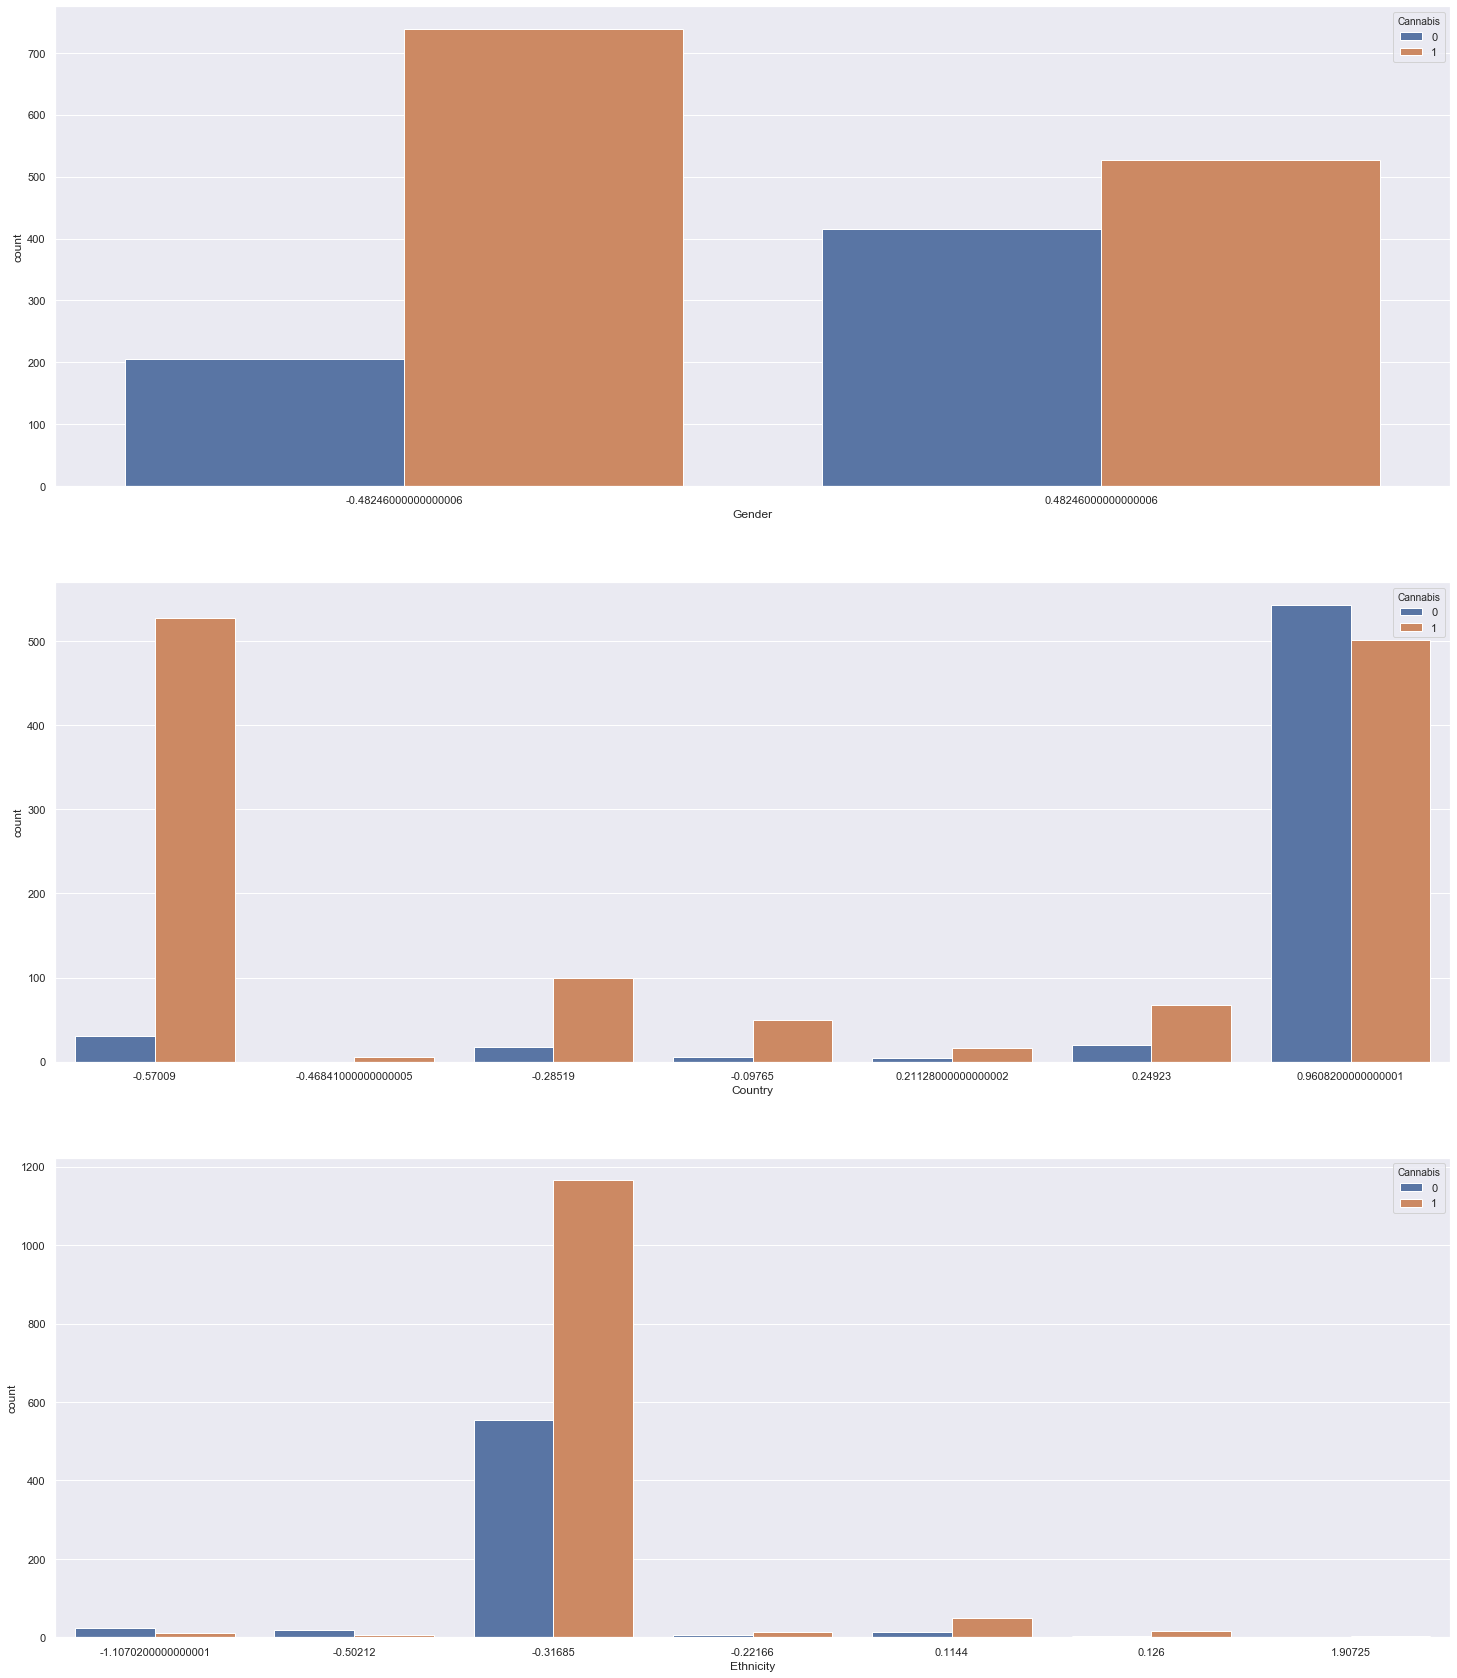

In [16]:
f, axes = plt.subplots(3, 1, figsize=(25, 30))

sns.countplot(x='Gender', hue='Cannabis', data = dataset, ax=axes[0]);
sns.countplot(x='Country', hue='Cannabis', data = dataset, ax=axes[1]);
sns.countplot(x='Ethnicity', hue='Cannabis', data = dataset, ax=axes[2]);

In [17]:
features = {
  'age': dataset['Age'],
  'gender': dataset['Gender'],
  'education': dataset['Education'],
  'country': dataset['Country'],
  'ethnicity': dataset['Ethnicity'],
  'nScore': dataset['Nscore'],
  'eScore': dataset['Escore'],
  'oScore': dataset['Oscore'],
  'aScore': dataset['Ascore'],
  'cScore': dataset['Cscore'],
  'impulsive': dataset['Impulsive'],
  'SS': dataset['SS'],
  'cannabis' : y
}

dataset = pd.DataFrame(features)
X = dataset.drop(columns= 'cannabis')
y = dataset['cannabis']

Controlliamo se ci sono valori nulli nel dataset:

In [18]:
dataset.isna().sum()

age          0
gender       0
education    0
country      0
ethnicity    0
nScore       0
eScore       0
oScore       0
aScore       0
cScore       0
impulsive    0
SS           0
cannabis     0
dtype: int64

Quindi il dataset finale con cui andremo a lavorare è il seguente:

In [19]:
dataset.head()

age   gender  education  country  ethnicity   nScore   eScore   oScore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    aScore   cScore  impulsive       SS cannabis  
0 -0.91699 -0.00665   -0.21712 -1.18084        0  
1  0.76096 -0.14277   -0.71126 -0.21575        1  
2 -1.62090 -1.01450   -1.37983  0.40148        1  
3  0.59042  0.58489   -1.37983 -1.18084        1  
4 -0.30172  1.30612   -0.21712 -0.21575        1

### Standardizzazione e regolarizzazione

Per quanto riguarda la standadizzazione delle feature, si può pensare che questa sia abbastanza inutile, in quanto gran parte dei valori sono già standardizzata ed i restanti fanno comunque parte di un dominio molto simile di valori.

Questo vale per alcuni modelli come ad esempio la Logistic Regression, dove non c'è molta differenza tra lo score dei due modelli, mentre possiamo vedere come nel Perceptron il modello migliora con la standardizzazione delle feature.




Dividiamo il nostro dataset in training e validation set.

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

Perceptron senza standardizzazione:


In [21]:
model = Pipeline([
    ("model",  Perceptron(random_state=42))
])
model.fit(X_train, y_train)
print("Score on training set: {:.5}".format(model.score(X_train, y_train)))
print("Score on validation set: {:.5}".format(model.score(X_val, y_val)))

Score on training set: 0.67516
Score on validation set: 0.69952


Perceptron con standardizzazione:


In [22]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Perceptron(random_state=42))
])
model.fit(X_train, y_train)
print("Score on training set: {:.5}".format(model.score(X_train, y_train)))
print("Score on validation set: {:.5}".format(model.score(X_val, y_val)))

Score on training set: 0.75239
Score on validation set: 0.77583


Logistic Regression senza standardizzazione:


In [23]:
model = Pipeline([
    ('model', LogisticRegression(random_state=42))
])

model.fit(X_train, y_train)
print("Score on training set: {:.5}".format(model.score(X_train, y_train)))
print("Score on validation set: {:.5}".format(model.score(X_val, y_val)))

Score on training set: 0.80892
Score on validation set: 0.83625


Logistic Regression con standardizzazione:


In [24]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

model.fit(X_train, y_train)
print("Score on training set: {:.5}".format(model.score(X_train, y_train)))
print("Score on validation set: {:.5}".format(model.score(X_val, y_val)))

Score on training set: 0.80892
Score on validation set: 0.83466


Sulla base di questa osservazione decidiamo di provare i modelli di learning che andremo ad implementare, sia con che senza l'utilizzo dello StandarScaler.

Andiamo ora a visualizzare i coefficienti del modello per vedere quali feature sono ritenute più importanti.


In [25]:
model_coeff = pd.Series(model.named_steps['model'].coef_[0], index= X_train.columns)
model_coeff

age         -0.782186
gender      -0.223863
education   -0.160557
country     -0.799019
ethnicity    0.203284
nScore      -0.066192
eScore      -0.112349
oScore       0.602018
aScore      -0.065977
cScore      -0.418981
impulsive    0.103130
SS           0.334694
dtype: float64

Possiamo osservare come l'età, il paese di residenza e l'etnia giochino un ruolo importate tra i dati personali del soggetto, mentre tra i tratti della personalità con score maggiore in modulo troviamo oScore e cScore e SS.

Come ci aspettavamo gender e country hanno valori negativi, mentre etnia positivo.


Proviamo ora a Regolarizzare i valori con norma L1, per vedere quali feature sono davvero utili alla risoluzione del problema.


In [26]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, penalty= "l1", C = 0.01, solver = "liblinear"))
])

model.fit(X_train, y_train)
print("Score on training set: {:.5}".format(model.score(X_train, y_train)))
print("Score on validation set: {:.5}".format(model.score(X_val, y_val)))

Score on training set: 0.79857
Score on validation set: 0.81558


In [27]:
model_coeff = pd.Series(model.named_steps['model'].coef_[0], index= X_train.columns)
model_coeff

age         -0.298307
gender       0.000000
education    0.000000
country     -0.383180
ethnicity    0.000000
nScore       0.000000
eScore       0.000000
oScore       0.119714
aScore       0.000000
cScore      -0.071781
impulsive    0.000000
SS           0.209723
dtype: float64

Quest'ultimo modello perde un po' di accuratezza, mentre molti pesi delle feature si annullano.
In modo abbastanza coerente ai coefficienti precedentemente visti, rimangono intatte le feature più importanti.

L'anullamento di alcuni attributi della personalità, potrebbe derivare dalla dipendenza che queste hanno tra di loro, così da risolvere alcuni problemi di collinearità, visti nell'analisi di correlazione precedente.
Ad esempio si annulano nScore la quale era correlata a cScore, Impulsive correlata a SS e aScore coorelata a oScore. 



## Modellazione


In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

Per ogni algoritmo che andremo a vedere, lo eseguiremo tramite Grid Search e K-fold cross validation così da poter ottimizzare gli iperparametri.

Il modello migliore verrà memorizzato e confrontato con gli altri in seguito.

In [29]:
models = {}
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

def grid_search_with_cross_validation(model, grid, X_train, y_train):

    grid_search = GridSearchCV(model, grid, cv=k_fold)

    grid_search.fit(X_train, y_train)
    
    score = grid_search.score(X_val, y_val)

    print("Best cross validation score: {}\n".format(grid_search.best_score_))
    print("Test set score: {}\n".format(score))
    print("Best params: {}\n".format(grid_search.best_params_))

    return grid_search.best_estimator_, score


### Perceptron


Riproponiamo di nuovo l'algoritmo del Perceptron, questa volta settando diversi valori per gli iperparametri, in modo da vedere se si può migliorare lo score precedente:


In [30]:
per_model = Pipeline([
    ("scaler", StandardScaler()),
    ("per", Perceptron(random_state=42))
])


grid = {
    'per__penalty': [None, "l2", "l1", "elasticnet"],
    'per__alpha': np.logspace(-4, 2, 7),
    'per__fit_intercept': [False, True],
    'per__tol': np.logspace(-4, 2, 7)
}

per_model, score = grid_search_with_cross_validation(per_model, grid, X_train, y_train)
models["Perceptron"] = {"Model": per_model, "Score": score}



Best cross validation score: 0.7667299057737305

Test set score: 0.7758346581875993

Best params: {'per__alpha': 0.0001, 'per__fit_intercept': True, 'per__penalty': None, 'per__tol': 0.1}



Proviamo ora un modello con feature polinomiali.

In [31]:
poly_model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=3)),
    ("per", Perceptron(random_state=42))
])


grid = {
    'per__penalty': [None, "l2", "l1", "elasticnet"],
    'per__alpha': np.logspace(-4, 2, 7),
    'per__fit_intercept': [False, True],
    'per__tol': np.logspace(-4, 2, 7)
}

poly_model, score = grid_search_with_cross_validation(poly_model, grid, X_train, y_train)
models["PolyPerceptron"] = {"Model": poly_model, "Score": score}

Best cross validation score: 0.7547966862707899

Test set score: 0.7265500794912559

Best params: {'per__alpha': 0.001, 'per__fit_intercept': True, 'per__penalty': 'l2', 'per__tol': 100.0}



A quanto pare le feature polinomiali sembrano peggiorare il modello.

### Logistic Regression

In [32]:
lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

grid = [{
    'scaler': [None, StandardScaler()],
    'lr__penalty':  ["l2", "l1"],
    'lr__tol':  np.logspace(-4, 2, 7),
    "lr__C": np.logspace(-4, 2, 7),
    'lr__fit_intercept': [False, True],
    'lr__solver': ['liblinear']
    },
   {'scaler': [None, StandardScaler()],
    'lr__penalty' : ["l2", "l1"],
    'lr__C' : np.logspace(-4, 2, 7),
    'lr__multi_class' : ["ovr", "multinomial"], 
    'lr__solver':["saga"],
    'lr__fit_intercept': [False, True],
    'lr__tol':  np.logspace(-4, 2, 7)
   }
]
lr, score = grid_search_with_cross_validation(lr, grid, X_train, y_train)
models["LogisticRegression"] = {"Model": lr, "Score": score}

Best cross validation score: 0.8080914437488144

Test set score: 0.8235294117647058

Best params: {'lr__C': 0.01, 'lr__fit_intercept': True, 'lr__multi_class': 'ovr', 'lr__penalty': 'l2', 'lr__solver': 'saga', 'lr__tol': 0.01, 'scaler': StandardScaler()}



Lo score della Logistic Regression anche con iperparamentri ottimizzati non sembra migliorare rispetto al modello precedentemente provato.



### SVM

In [33]:
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=42))
])

grid = [
  {'scaler': [None, StandardScaler()],
   'svc__C': [0.01, 0.1, 1, 10, 100], 
   'svc__kernel': ['linear'], 
   'svc__tol':  np.logspace(-4, 2, 7)
   }, 
  {'scaler': [None, StandardScaler()],
   'svc__C': [0.01, 0.1, 1, 10 ,100], 
   'svc__gamma': ['scale', 'auto'], 
   'svc__kernel': ['rbf'],
   'svc__tol':  np.logspace(-4, 2, 7)
   }
]


svm_model, score= grid_search_with_cross_validation(svm_model, grid, X_train, y_train)
models["SupportVectorMachine"] = {"Model": svm_model, "Score": score}


Best cross validation score: 0.8120755074938343

Test set score: 0.8314785373608903

Best params: {'scaler': None, 'svc__C': 10, 'svc__kernel': 'linear', 'svc__tol': 1.0}



### K-Neighbors


In [34]:
knc_model = Pipeline([
    ("scaler", StandardScaler()),
    ("knc", KNeighborsClassifier())
])

#print(svm_model.get_params())

grid = {'scaler': [None, StandardScaler()],
        'knc__n_neighbors': range(1, 20, 1),
        'knc__weights': ['uniform', 'distance']}

knc_model, score = grid_search_with_cross_validation(knc_model, grid, X_train, y_train)
models["K-Neighbor"] = {"Model": knc_model, "Score" : score}

Best cross validation score: 0.8009359387845445

Test set score: 0.8124006359300477

Best params: {'knc__n_neighbors': 19, 'knc__weights': 'distance', 'scaler': None}



### Decision Tree


In [35]:
tree_model = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(random_state=42))
])


grid = {'scaler': [None, StandardScaler()],
        'tree__max_depth': [None] + [i for i in range(2, 7)],
        'tree__max_features': range(2, dataset.columns.size-1, 1)}

tree_model, score = grid_search_with_cross_validation(tree_model, grid, X_train, y_train)
models["DecisionTree"] = {"Model": tree_model, "Score" : score}

Best cross validation score: 0.7897995320306078

Test set score: 0.7933227344992051

Best params: {'scaler': None, 'tree__max_depth': 4, 'tree__max_features': 5}



### Random Forest

Per il parametro n_estimators sono stati fatti diversi test e infine si è selezionato il valore migliore per ridurre il tempo di calcolo.

In [36]:
forest_model = Pipeline([
    ("scaler", StandardScaler()),
    ("forest", RandomForestClassifier(random_state=42))
])


grid = {'scaler': [None, StandardScaler()],
        'forest__n_estimators':[53],
        'forest__min_samples_split': range(2, 5), 
        'forest__max_depth': [None] + [i for i in range(1, 3)],
        'forest__max_features': ['auto', 'sqrt', 'log2', None]}

forest_model, score = grid_search_with_cross_validation(forest_model, grid, X_train, y_train)
models["RandomForest"] = {"Model": forest_model, "Score" : score}

Best cross validation score: 0.7993265035097705

Test set score: 0.8187599364069952

Best params: {'forest__max_depth': None, 'forest__max_features': None, 'forest__min_samples_split': 3, 'forest__n_estimators': 53, 'scaler': None}



### Neural Network

In [37]:
scaler_X = StandardScaler()
Xs_train = scaler_X.fit_transform(X_train.astype(float))
Xs_val = scaler_X.transform(X_val)

yc_train = to_categorical(y_train)
yc_val = to_categorical(y_val)

In [38]:
model = Sequential([
    Dense(128,  activation="relu", input_dim=12),
    Dense(2, activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(Xs_train, yc_train, batch_size=128, epochs=50)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/50
1256/1256 [==============================] - 0s 68us/sample - loss: 0.6443 - acc: 0.6282
Epoch 2/50
1256/1256 [==============================] - 0s 11us/sample - loss: 0.5301 - acc: 0.7627
Epoch 3/50
1256/1256 [==============================] - 0s 11us/sample - loss: 0.4751 - acc: 0.7922
Epoch 4/50
1256/1256 [==============================] - 0s 9us/sample - loss: 0.4459 - acc: 0.8081
Epoch 5/50
1256/1256 [==============================] - 0s 10us/sample - loss: 0.4292 - acc: 0.8113
Epoch 6/50
1256/1256 [==============================] - 0s 10us/sample - loss: 0.4190 - acc: 0.8161
Epoch 7/50
1256/1256 [==============================] - 0s 10us/sample - loss: 0.4120 - acc: 0.8121
Epoch 8/50
1256/1256 [==============================] - 0s 10us/sample - loss: 0.4073 - acc: 0.8121
Epoch 9/50
1256/1256 [==============================] - 0s 10us/sample - loss: 0.40

In [39]:
score = model.evaluate(scaler_X.transform(X_val), yc_val)
models["NeuralNetwork"] = {"Model": model, "Score": score[1]}
print("Error and Score: {}\n".format(score))

629/629 [==============================] - 0s 41us/sample - loss: 0.3805 - acc: 0.8378
Error and Score: [0.38050669322711295, 0.8378378]



## Valutazione dei modelli

Valutiamo ora i modelli trovati attraverso altre metriche oltre l'accuracy, in quanto questa potrebbe non essere una stima veriteria della capacità predittiva del modello.

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

### Matrice di confusione, Precision, Recall e F1-Score e intervallo di confidenza

In [41]:
def plot_confusion_matrix(cm, name):
  plt.figure(figsize=(8, 6))
  cmap = plt.get_cmap('Reds')
  sns.set(font_scale=1)
  hm = sns.heatmap(cm ,cmap = cmap,annot=True, square=True, linewidths=.5, fmt='g',
              yticklabels = ['Non-user', 'User'], xticklabels = ['Non-user', 'User'])
  plt.xticks(fontsize=13,rotation=50)
  plt.yticks(fontsize=13)
  plt.title("{} Confusion Matrix".format(name),fontsize=18)
  plt.show()

def precision_recall_f1(name, y, X= None, y_pred = None) :
    model = models[name]
    if name != "NeuralNetwork":
      y_pred = model["Model"].predict(X)
      pos= np.array(1, dtype='>U1')
    else:
      pos =1
    model["Precision"] = precision_score(y, y_pred, pos_label=pos)
    model["Recall"] = recall_score(y, y_pred, pos_label=pos)
    model["F1_Score"] = f1_score(y, y_pred, average="macro")
    model["Interval"] = conf_interval(name)
    
    print("{}:\n\n \
    Accuracy: {}\n\n \
    Precision: {}\n\n \
    Recall: {}\n\n \
    F1 Score: {}\n\n \
    Interval of Confidence with 95% of confidence: {}\n\n\n".format(name, 
                                                                    model["Score"],
                                                                    model["Precision"], 
                                                                    model["Recall"], 
                                                                    model["F1_Score"],
                                                                    model["Interval"]))

def conf_interval(name, N= len(y_val), Z=1.96):
    model = models[name]
    a = model["F1_Score"]
    c = (2 * N * a + Z**2) / (2 * (N + Z**2))
    d = Z * np.sqrt(Z**2 + 4*N*a - 4*N*a**2) / (2 * (N + Z**2))
    return (c - d, c + d)



def calculate(cm, name, y, X = None, y_pred= None):
    plot_confusion_matrix(cm, name)
    precision_recall_f1(name, y, X, y_pred)

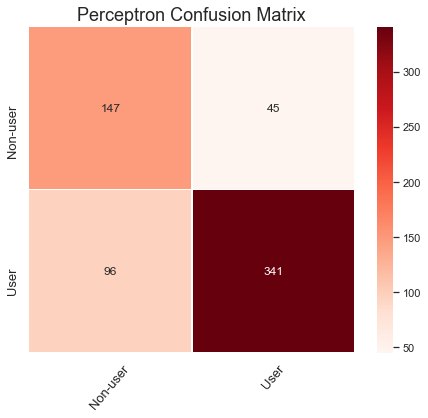

Perceptron:

     Accuracy: 0.7758346581875993

     Precision: 0.883419689119171

     Recall: 0.7803203661327232

     F1 Score: 0.7522688230611305

     Interval of Confidence with 95% of confidence: (0.7170680727529335, 0.7844068293566975)





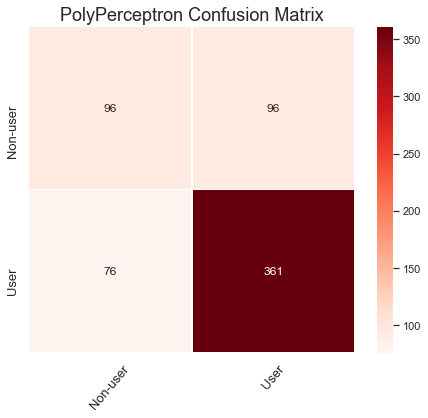

PolyPerceptron:

     Accuracy: 0.7265500794912559

     Precision: 0.7899343544857768

     Recall: 0.8260869565217391

     F1 Score: 0.6675393957273152

     Interval of Confidence with 95% of confidence: (0.6298039637794379, 0.7032407662524731)





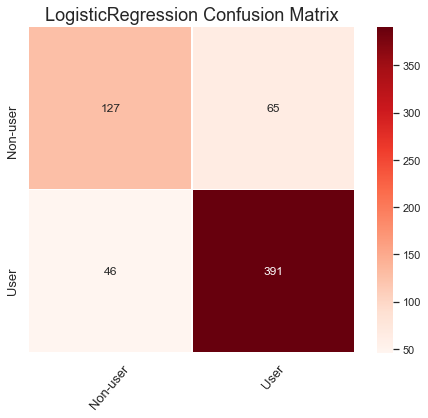

LogisticRegression:

     Accuracy: 0.8235294117647058

     Precision: 0.8574561403508771

     Recall: 0.8947368421052632

     F1 Score: 0.7857951494884106

     Interval of Confidence with 95% of confidence: (0.7520479803356868, 0.8160725383792975)





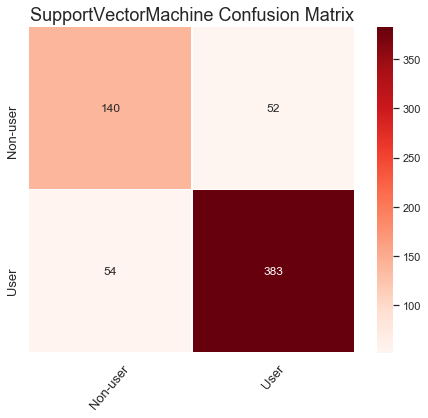

SupportVectorMachine:

     Accuracy: 0.8314785373608903

     Precision: 0.8804597701149425

     Recall: 0.8764302059496567

     F1 Score: 0.8019144840043733

     Interval of Confidence with 95% of confidence: (0.7689750353799544, 0.8311884508344499)





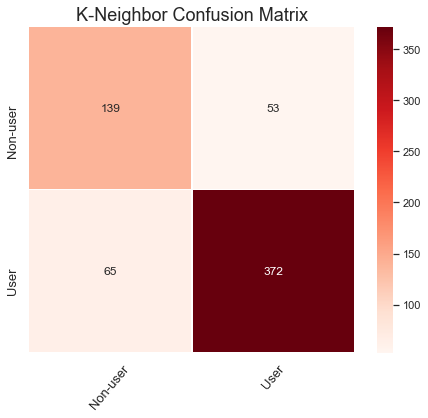

K-Neighbor:

     Accuracy: 0.8124006359300477

     Precision: 0.8752941176470588

     Recall: 0.851258581235698

     F1 Score: 0.78256462537205

     Interval of Confidence with 95% of confidence: (0.7486645014723274, 0.8130341901402955)





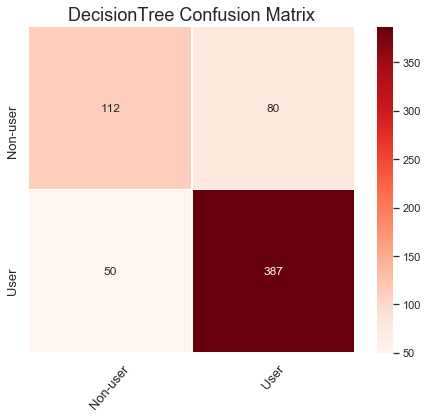

DecisionTree:

     Accuracy: 0.7933227344992051

     Precision: 0.828693790149893

     Recall: 0.88558352402746

     F1 Score: 0.7444815259237039

     Interval of Confidence with 95% of confidence: (0.708983210281284, 0.7770116415300058)





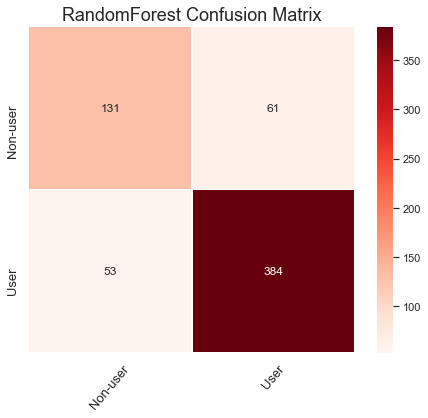

RandomForest:

     Accuracy: 0.8187599364069952

     Precision: 0.8629213483146068

     Recall: 0.8787185354691075

     F1 Score: 0.7837784049790129

     Interval of Confidence with 95% of confidence: (0.7499354109349512, 0.8141761036424693)





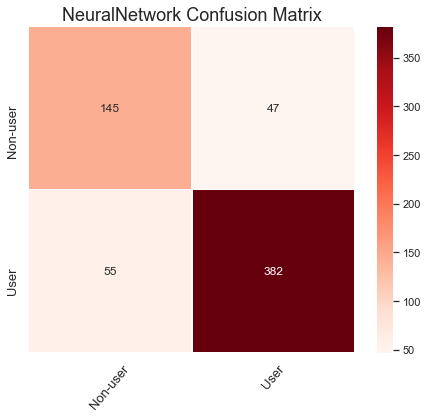

NeuralNetwork:

     Accuracy: 0.837837815284729

     Precision: 0.8904428904428905

     Recall: 0.8741418764302059

     F1 Score: 0.8110065042183155

     Interval of Confidence with 95% of confidence: (0.7785570892641364, 0.839680053026511)





In [42]:
for name, model in models.items(): 
  if name == "NeuralNetwork":
    y_pred = model["Model"].predict(Xs_val)
    cm = confusion_matrix(yc_val.argmax(axis=1), y_pred.argmax(axis=1))
    calculate(cm, name, yc_val.argmax(axis=1), y_pred = y_pred.argmax(axis=1) )
  else:
    y_pred = model["Model"].predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    calculate(cm, name, y_val, X = X_val )


Possiamo ora verificare tramite le nuove metriche i modelli che risultano esseri i migliori per questo task.

I modelli di machine learning con i punteggi migliori sono la Logistic Regression, la SVM e il K-Neighbor e la Random Forest.


I punteggi della SVM sembrano essere i migliori, quelli della Logistic Regression superano di poco quelli del modello K-Neighbor e Random Forest, mentre quest'ultime due sembrano essere molto simili.


Infine, il modello di Deep Learning testato pare essere il migliore tra tutti.


### Confronto dei modelli con intervallo di confidenza


Come ultimo test per verificare quale dei modelli sia davvero il migliore, decidiamo di utilizzare l'intervallo di confidenza (sempre con confidenza al 95%) per confrontare i modelli tra di loro.

In [43]:
from scipy import stats 

def difference_between_two_models(error1, error2, confidence):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

Proviamo a confrontare tra di loro i 4 modelli ritenuti migliori, per verificare effettivamente se un modello è migliore dell'altro.

In [44]:

lg_err = 1 - models["LogisticRegression"]["F1_Score"]
svm_err = 1 - models["SupportVectorMachine"]["F1_Score"]
knc_err = 1 - models["K-Neighbor"]["F1_Score"]
rf_err = 1 - models["RandomForest"]["F1_Score"]
nn_err = 1 - models["NeuralNetwork"]["F1_Score"]


print("Support Vector Machine vs K-Neighbor, intervallo di confidenza:")
difference_between_two_models(svm_err, knc_err, 0.95)

print("Logistic Regression vs Support Vector Machine, intervallo di confidenza:")
difference_between_two_models(lg_err, svm_err, 0.95)

print("Logistic Regression vs K-Neighbor, intervallo di confidenza:")
difference_between_two_models(lg_err, knc_err, 0.95)

print("Logistic Regression vs Neural Network, intervallo di confidenza:")
difference_between_two_models(lg_err, nn_err, 0.95)

print("Neural Network vs Support Vector Machine, intervallo di confidenza:")
difference_between_two_models(nn_err, svm_err, 0.95)

print("Neural Network vs K-Neighbor, intervallo di confidenza:")
difference_between_two_models(nn_err, knc_err, 0.95)

print("Support Vector Machine vs Random Forest, intervallo di confidenza:")
difference_between_two_models(svm_err, rf_err, 0.95)

print("K-Neighbor vs Random Forest, intervallo di confidenza:")
difference_between_two_models(knc_err, rf_err, 0.95)

print("Logistic Regression vs Random Forest, intervallo di confidenza:")
difference_between_two_models(lg_err, rf_err, 0.95)

print("Neural Network vs Random Forest, intervallo di confidenza:")
difference_between_two_models(nn_err, rf_err, 0.95)

Support Vector Machine vs K-Neighbor, intervallo di confidenza:
Valore minimo: -0.01826878232771883
Valore massimo: 0.05696849959236543

Logistic Regression vs Support Vector Machine, intervallo di confidenza:
Valore minimo: -0.021394189122143352
Valore massimo: 0.053632858154068756

Logistic Regression vs K-Neighbor, intervallo di confidenza:
Valore minimo: -0.03492587574367282
Valore massimo: 0.04138692397639402

Logistic Regression vs Neural Network, intervallo di confidenza:
Valore minimo: -0.011981311429116896
Valore massimo: 0.062404020888926874

Neural Network vs Support Vector Machine, intervallo di confidenza:
Valore minimo: -0.02754874551793418
Valore massimo: 0.045732785945818755

Neural Network vs K-Neighbor, intervallo di confidenza:
Valore minimo: -0.00885680890478363
Valore massimo: 0.06574056659731481

Support Vector Machine vs Random Forest, intervallo di confidenza:
Valore minimo: -0.019443241600816154
Valore massimo: 0.05571539965153697

K-Neighbor vs Random Forest, 

Come possiamo osservare, in tutti i casi, l'intervallo contiene lo zero. Ciò vuol dire che la differenza tra questi modelli non è statisticamente significativa.

Proviamo infine a confrontare i modelli restanti, con uno dei modelli migliori (ad esmepio la SVM) per verificare se effettivamente sono peggiori di questa.

In [45]:
dt_err = 1 - models["DecisionTree"]["F1_Score"]
per_err = 1 - models["Perceptron"]["F1_Score"]
poly_err = 1 - models["PolyPerceptron"]["F1_Score"]


print("Support Vector Machine vs Perceptron, intervallo di confidenza:")
difference_between_two_models(svm_err, per_err, 0.95)

print("Support Vector Machine vs PolyPerceptron, intervallo di confidenza:")
difference_between_two_models(svm_err, poly_err, 0.95)

print("Support Vector Machine vs Decision Tree, intervallo di confidenza:")
difference_between_two_models(svm_err, dt_err, 0.95)




Support Vector Machine vs Perceptron, intervallo di confidenza:
Valore minimo: 0.011111809961245125
Valore massimo: 0.08817951192524036

Support Vector Machine vs PolyPerceptron, intervallo di confidenza:
Valore minimo: 0.09390464422329589
Valore massimo: 0.17484553233082015

Support Vector Machine vs Decision Tree, intervallo di confidenza:
Valore minimo: 0.018683806712034443
Valore massimo: 0.09618210944930435



I risultati confermano la differenza tra il modello di SVM con quello di Perceptron, Perceptron con feature polinomiali e Decision Tree.

### Bilanciamento delle classi




Nonostante la nostra y non sia troppo sbilanciata, proviavo comunque a trasformare i dati in modo tale che le classi siano completamente bilanciate per poi testarli su uno dei modelli migliori, per verificare se i risultati ottenuti siano migliori o peggiori dei precedenti.


In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

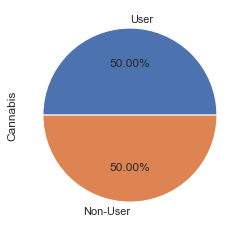

In [47]:
cannabis = pd.DataFrame({"Cannabis": y_res})
cannabis = cannabis.astype(np.str)
cannabis.replace({"0":"Non-User", "1": "User"}, inplace=True)
cannabis['Cannabis'].value_counts().plot.pie(autopct='%1.2f%%', y = 'Cannabis');

In [48]:
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=42))
])


grid = {
    'scaler': [None, StandardScaler()],
   'svc__C': [0.01, 0.1, 1, 10, 100], 
   'svc__kernel': ['linear'], 
   'svc__tol':  np.logspace(-4, 2, 7)
   }

svm_model, score= grid_search_with_cross_validation(svm_model, grid, X_res, y_res)
y_pred = svm_model.predict(X_val)
f1 = f1_score(y_val, y_pred, average="macro")
print("F1 score: {}\n".format(f1))
models["SupportVectorMachine with Smote"] = {"Model": svm_model, "Score": score, "F1_Score": f1}


Best cross validation score: 0.816421577548866

Test set score: 0.7837837837837838

Best params: {'scaler': None, 'svc__C': 0.1, 'svc__kernel': 'linear', 'svc__tol': 1.0}

F1 score: 0.7682186673602982



Osserviamo come il modello sembra peggiorare.


## Valutazione dei Modelli

Dal precedente confronto dei modelli tramite intervallo di confidenza abbiamo stabilito che la differenza tra i seguenti modelli non è statisticamente significativa: Neural Network, SVM, Logistic Regression, K-Neighbor e Random Forest.

Riassumiamo i loro punteggi:


In [49]:
finalModels = {"LogisticRegression" : models["LogisticRegression"],
               "SupportVectorMachine": models["SupportVectorMachine"], 
               "K-Neighbor": models["K-Neighbor"],
               "Random Forest": models["RandomForest"], 
               "NeuralNetwork": models["NeuralNetwork"]}
for name, model in finalModels.items(): 
  print("{} \n  Score: {} \n  F1 Score {}\n".format(name, model["Score"], model["F1_Score"]))

LogisticRegression 
  Score: 0.8235294117647058 
  F1 Score 0.7857951494884106

SupportVectorMachine 
  Score: 0.8314785373608903 
  F1 Score 0.8019144840043733

K-Neighbor 
  Score: 0.8124006359300477 
  F1 Score 0.78256462537205

Random Forest 
  Score: 0.8187599364069952 
  F1 Score 0.7837784049790129

NeuralNetwork 
  Score: 0.837837815284729 
  F1 Score 0.8110065042183155



Decidiamo quindi di scegliere uno di questi modelli, la SVM, per fare le ultime considerazioni.

### Confronto con modello Random

Per prima cosa possiamo facilmente dimostrare che questo modello sia migliore di un modello casuale.

In [50]:
from sklearn.dummy import DummyClassifier
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(X_train, y_train)

score = random.score(X_val, y_val)
y_pred = random.predict(X_val)
f1 = f1_score(y_val, y_pred, average="macro")
print("Random Model\n   Validation score: {}\n   F1 score: {}\n".format(score, f1))
models["Dummy"] = {"Model": random, "Score": score, "F1_Score": f1}


Random Model
   Validation score: 0.5278219395866455
   F1 score: 0.5046653144016228



In [51]:
d_err = 1 - models["Dummy"]["F1_Score"]

print("Support Vector Machine vs Modello Casuale, intervallo di confidenza:")
difference_between_two_models(svm_err, d_err, 0.99)

Support Vector Machine vs Modello Casuale, intervallo di confidenza:
Valore minimo: 0.23794045316441909
Valore massimo: 0.3565578860410819



### Interpretazione coscienza appresa e confronto modello originale


Visualizziamo i parametri del modello.

In [52]:
model_coeff = pd.Series(models["SupportVectorMachine"]["Model"].named_steps['svc'].coef_[0], index= X_train.columns)
model_coeff

age         -0.642004
gender      -0.269338
education   -0.156181
country     -0.867864
ethnicity    0.969014
nScore      -0.018369
eScore      -0.121661
oScore       0.468595
aScore      -0.072564
cScore      -0.294063
impulsive    0.137602
SS           0.236609
dtype: float64

I paramtri sembrano confermare le considerazioni precedentemente fatte ad eccezione di nScore, dove otteniamo un valore negativo (anche se basso) anzichè un valore positivo.


Il modello originale voleva dimostrare come anche i tratti della personalità possano influenzare l'utilizzo o meno di sostanze stupefacenti.

Possiamo confermare che in particolare l'apertura a nuove esperienze, l'impulsività e la ricerca di sensazioni portino ad un'utilizzo maggiore di cannabis, mentre la cosciensità, l'estroversione, la "piacevolezza" lo contrastino.

Possiamo inoltre notare un valore di etnia molto alto, derivante dal fatto che la classe con valore maggiore ha solo tre istanze, tutte con Cannabis pari a 1.



In [53]:
dataset[dataset["ethnicity"] == 1.90725]

age   gender  education  country  ethnicity   nScore   eScore  \
821  -0.95197 -0.48246   -0.61113 -0.28519    1.90725  0.04257 -0.30033   
1059 -0.95197  0.48246    0.45468 -0.57009    1.90725  1.23461  1.93886   
1462 -0.07854  0.48246   -0.61113 -0.57009    1.90725  0.73545 -0.57545   

       oScore   aScore   cScore  impulsive       SS cannabis  
821  -0.17779 -2.07848 -2.04506    1.29221  1.22470        1  
1059  1.65653 -0.15487 -0.52745    1.29221  1.22470        1  
1462 -0.31776 -0.91699 -0.14277    0.88113 -0.21575        1

Nella risoluzione del problema originale si è considerato come miglior modello quello che dava una differenzza tra sensitività (recall) e specificità minima.


Secondo il paper originale il modello riusciva a raggiungere un sensitività e specificità superiore al 75%:

In [54]:
def calc_spec_sens(tn, fp, fn, tp):
  sensitivity = tp/ (tp+fn)
  specificity = tn / (tn+fp)
  return sensitivity, specificity

In [55]:
y_pred = models["LogisticRegression"]["Model"].predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity, specificity = calc_spec_sens(tn, fp, fn, tp)
print("Logistic Regression\n   Sensitivity: {}\n   Specificity: {}\n".format(sensitivity, specificity))

y_pred = models["SupportVectorMachine"]["Model"].predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity, specificity = calc_spec_sens(tn, fp, fn, tp)
print("Support Vector Machine\n   Sensitivity: {}\n   Specificity: {}\n".format(sensitivity, specificity))

y_pred = models["K-Neighbor"]["Model"].predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity, specificity = calc_spec_sens(tn, fp, fn, tp)
print("K-Neighbor\n   Sensitivity: {}\n   Specificity: {}\n".format(sensitivity, specificity))

y_pred = models["RandomForest"]["Model"].predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity, specificity = calc_spec_sens(tn, fp, fn, tp)
print("Random Forest\n   Sensitivity: {}\n   Specificity: {}\n".format(sensitivity, specificity))

y_pred = models["NeuralNetwork"]["Model"].predict(Xs_val)
tn, fp, fn, tp = confusion_matrix(yc_val.argmax(axis=1), y_pred.argmax(axis=1)).ravel()
sensitivity, specificity = calc_spec_sens(tn, fp, fn, tp)
print("Neural Network\n   Sensitivity: {}\n   Specificity: {}\n".format(sensitivity, specificity))


Logistic Regression
   Sensitivity: 0.8947368421052632
   Specificity: 0.6614583333333334

Support Vector Machine
   Sensitivity: 0.8764302059496567
   Specificity: 0.7291666666666666

K-Neighbor
   Sensitivity: 0.851258581235698
   Specificity: 0.7239583333333334

Random Forest
   Sensitivity: 0.8787185354691075
   Specificity: 0.6822916666666666

Neural Network
   Sensitivity: 0.8741418764302059
   Specificity: 0.7552083333333334



I nostri modelli ottengono tutti una sensitività molto più alta del modello originale, ma solo la Rete Neurale riesce a raggiungere un punteggio del 75% nella specificità (la maggior parte delle volte). 

Tuttavia la sensitività e specificità del modello originale solo state calcolate tramite Leave One Out Cross Validation. Inoltre il papar non specifica se il modello considerato separava gli User e i Non-user nello stesso modo in cui sono stati separati in questo progetto.

